<h2>Кореляційний аналіз даних про вплив різних факторів на продовжуваність життя</h2>

<p>
Хоча в минулому було проведено багато досліджень факторів, що впливають на очікувану тривалість життя, враховуючи демографічні змінні, структуру доходу та рівень смертності. Встановлено, що вплив імунізації та індекс людського розвитку раніше не враховувався. Крім того, деякі з минулих досліджень проводилися з урахуванням множинної лінійної регресії на основі набору даних за один рік для всіх країн. Отже, це дає мотивацію для вирішення обох факторів, зазначених раніше, шляхом формулювання регресійної моделі на основі моделі змішаних ефектів і множинної лінійної регресії, враховуючи дані за період з 2000 по 2015 рік для всіх країн. Також буде розглянуто важливу імунізацію, наприклад проти гепатиту В, поліомієліту та дифтерії. У двох словах, це дослідження буде зосереджено на факторах імунізації, факторах смертності, економічних факторах, соціальних факторах та інших факторах, пов’язаних зі здоров’ям. Оскільки спостереження в цьому наборі даних базуються на різних країнах, країні буде легше визначити фактор прогнозування, який сприяє нижчому значенню очікуваної тривалості життя. Це допоможе підказати країні, якій території слід надати значення, щоб ефективно покращити очікувану тривалість життя її населення.
</p>
<p>
Проект покладається на точність даних. Сховище даних Глобальної обсерваторії охорони здоров’я (GHO) під керівництвом Всесвітньої організації охорони здоров’я (ВООЗ) відстежує стан здоров’я, а також багато інших пов’язаних факторів для всіх країн. Набори даних стають доступними для громадськості з метою аналізу даних про здоров’я. Набір даних, пов’язаний із очікуваною тривалістю життя та факторами здоров’я для 193 країн, було зібрано з того самого веб-сайту сховища даних ВООЗ, а відповідні економічні дані – з веб-сайту Організації Об’єднаних Націй. Серед усіх категорій факторів, пов'язаних зі здоров'ям, були обрані лише ті критичні фактори, які є більш репрезентативними. Було помічено, що за останні 15 років у секторі охорони здоров’я відбувся величезний розвиток, що призвело до покращення рівня смертності людей, особливо в країнах, що розвиваються, порівняно з останніми 30 роками. Тому в цьому проекті ми розглянули дані за 2000-2015 роки для 193 країн для подальшого аналізу. Окремі файли даних були об’єднані в єдиний набір даних. При первинному візуальному огляді даних було виявлено деякі відсутні значення. Оскільки набори даних надходили від ВООЗ, ми не виявили очевидних помилок. Результат показав, що більшість відсутніх даних стосуються населення, гепатиту В і ВВП. Відсутні дані були з менш відомих країн, таких як Вануату, Тонга, Того, Кабо-Верде тощо. Знайти всі дані для цих країн було важко, тому було вирішено виключити ці країни з остаточного набору даних моделі. Остаточний об’єднаний файл (остаточний набір даних) складається з 22 стовпців і 2938 рядків, що означало 20 прогнозних змінних. Потім усі прогнозні змінні були розділені на кілька широких категорій: фактори, пов’язані з імунізацією, фактори смертності, економічні фактори та соціальні фактори.
</p>

In [82]:
from enum import Enum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class Description(Enum):
   COUNTRY = 'Country'
   YEAR = 'Year'
   STATUS = 'Status'
   LIFE_EXPECTANCY = 'Life expectancy '

class Factors(Enum):
   ADULT_MORTALITY = 'Adult Mortality'
   HEPATITIS_B = 'Hepatitis B'
   MEASLES = 'Measles '
   POLIO = 'Polio'
   DIPHTHERIA = 'Diphtheria '
   HIV_AIDS = ' HIV/AIDS'
   GDP = 'GDP'
   INFANT_DEATHS = 'infant deaths'
   ALCOHOL = 'Alcohol'
   PERCENTAGE_EXPENDITURE = 'percentage expenditure'
   BMI = ' BMI '
   UNDER_FIVE_DEATHS = 'under-five deaths '
   TOTAL_EXPENDITURE = 'Total expenditure'
   THINNESS_1_19_YEARS = ' thinness  1-19 years'
   INCOME_COMPOSITION_OF_RESOURCES = 'Income composition of resources'
   SCHOOLING = 'Schooling'

df = pd.read_csv("Life Expectancy Data.csv")

factors = [member.value for member in Factors]

def remove_empty():
   group_header = Description.COUNTRY.value
   country_means = df.groupby(group_header)[factors].mean()

   with_nan = country_means.index[country_means.isna().any(axis=1)]
   filtered = df[~df[group_header].isin(with_nan)]

   for country, group in filtered.groupby(group_header):
      factor_means = country_means.loc[country]
      group[factors] = group[factors].replace(0, factor_means)

   return filtered

df = remove_empty()
df = df[(df[factors] != 0).all(axis=1)]

scaler = StandardScaler()
df[factors] = scaler.fit_transform(df[factors])

c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distribution of Life Expectancy'}, xlabel='Life expectancy ', ylabel='Count'>

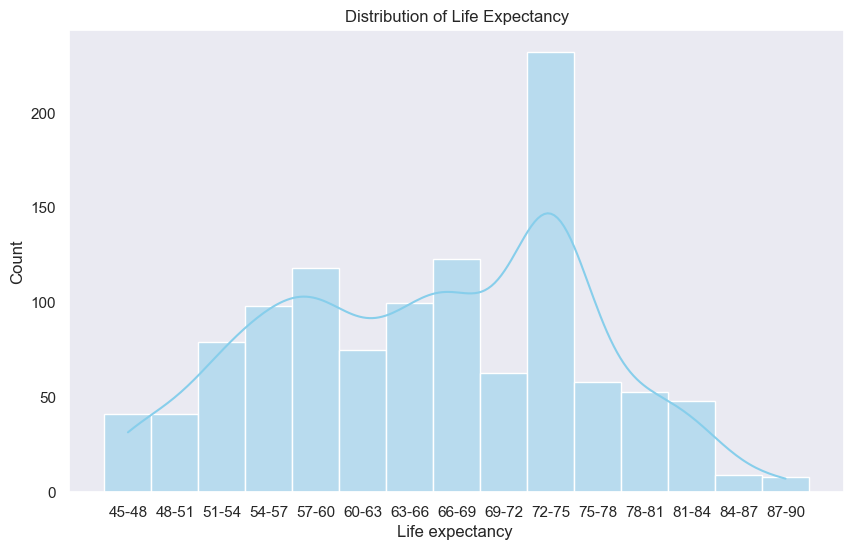

In [83]:
def cut_bins(min=50, max=90, step=5):
    bin_edges = np.arange(min, max + step, step)
    bin_labels = [f'{start}-{end}' for start, end in zip(bin_edges[:-1], bin_edges[1:])]

    return bin_edges, bin_labels

bin_edges, bin_labels = cut_bins(min=45, step=3)

life_exp = pd.cut(df[Description.LIFE_EXPECTANCY.value], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(10, 6))
plt.title('Distribution of Life Expectancy')
sns.histplot(life_exp, bins=bin_labels, kde=True, color='skyblue')

c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

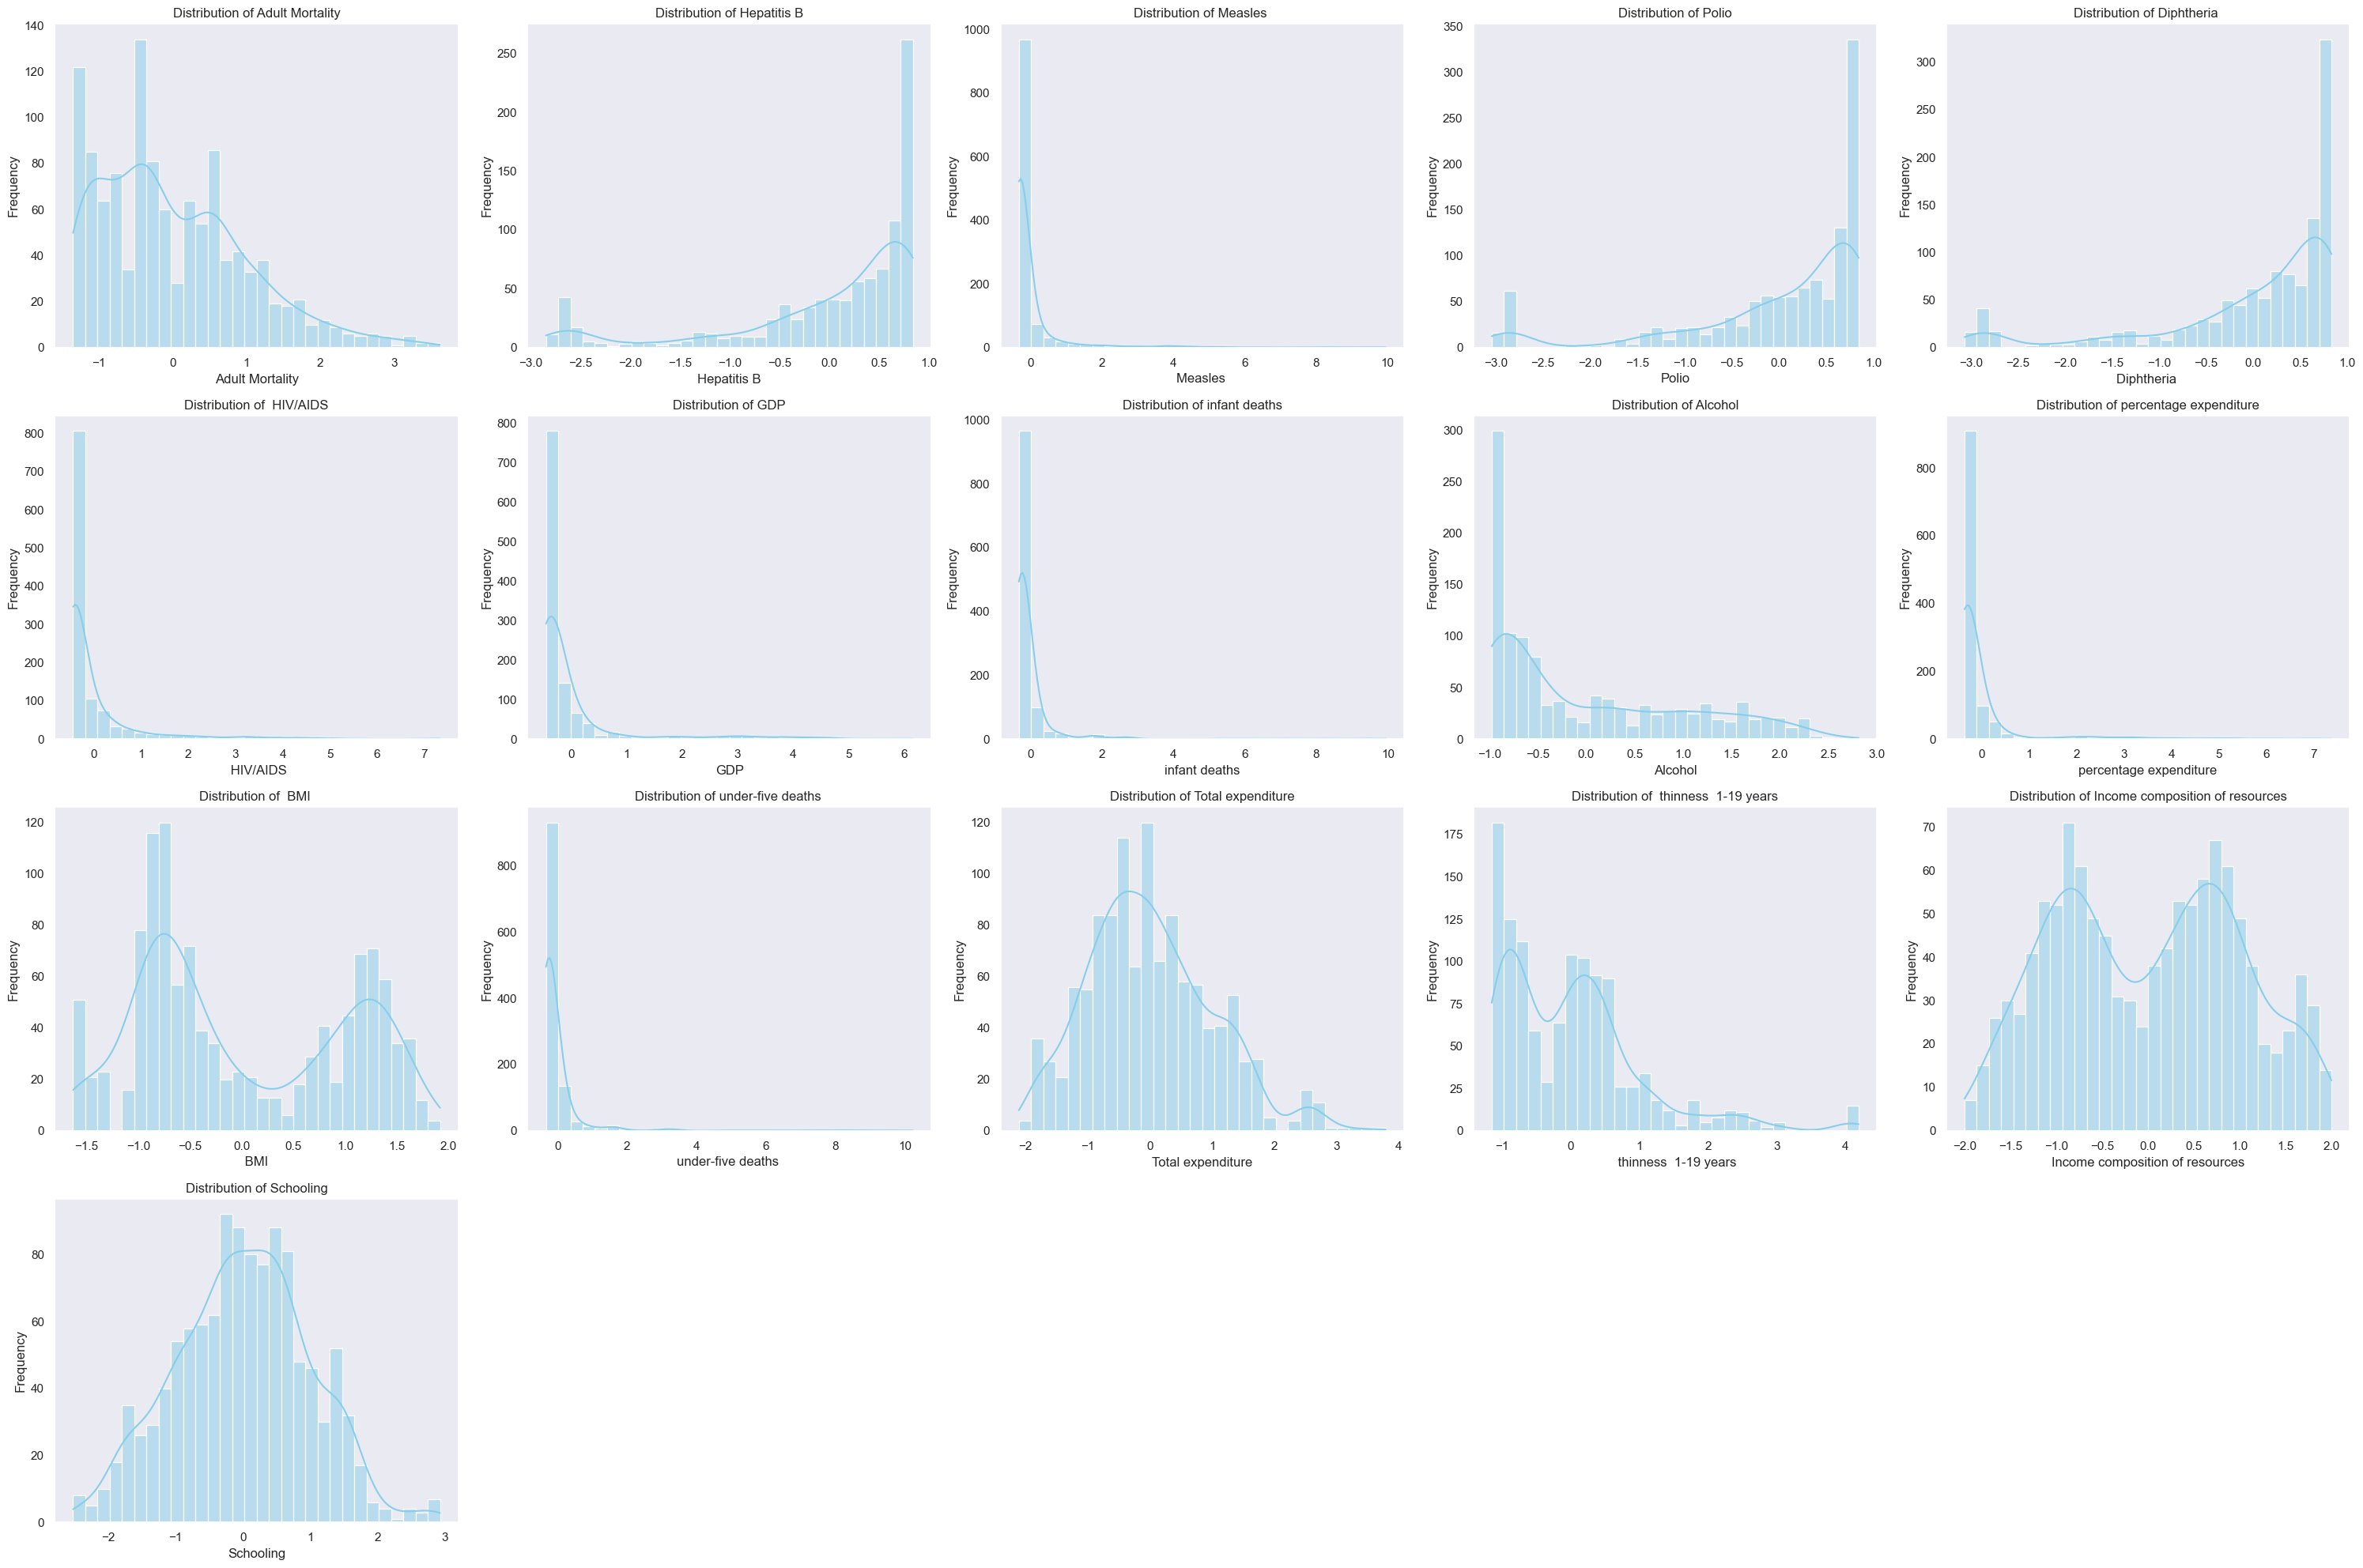

In [84]:
plt.figure(figsize=(30, 20))   

for factor in factors:
    plt.subplot(4, 5, factors.index(factor) + 1)
    sns.histplot(df[factor], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

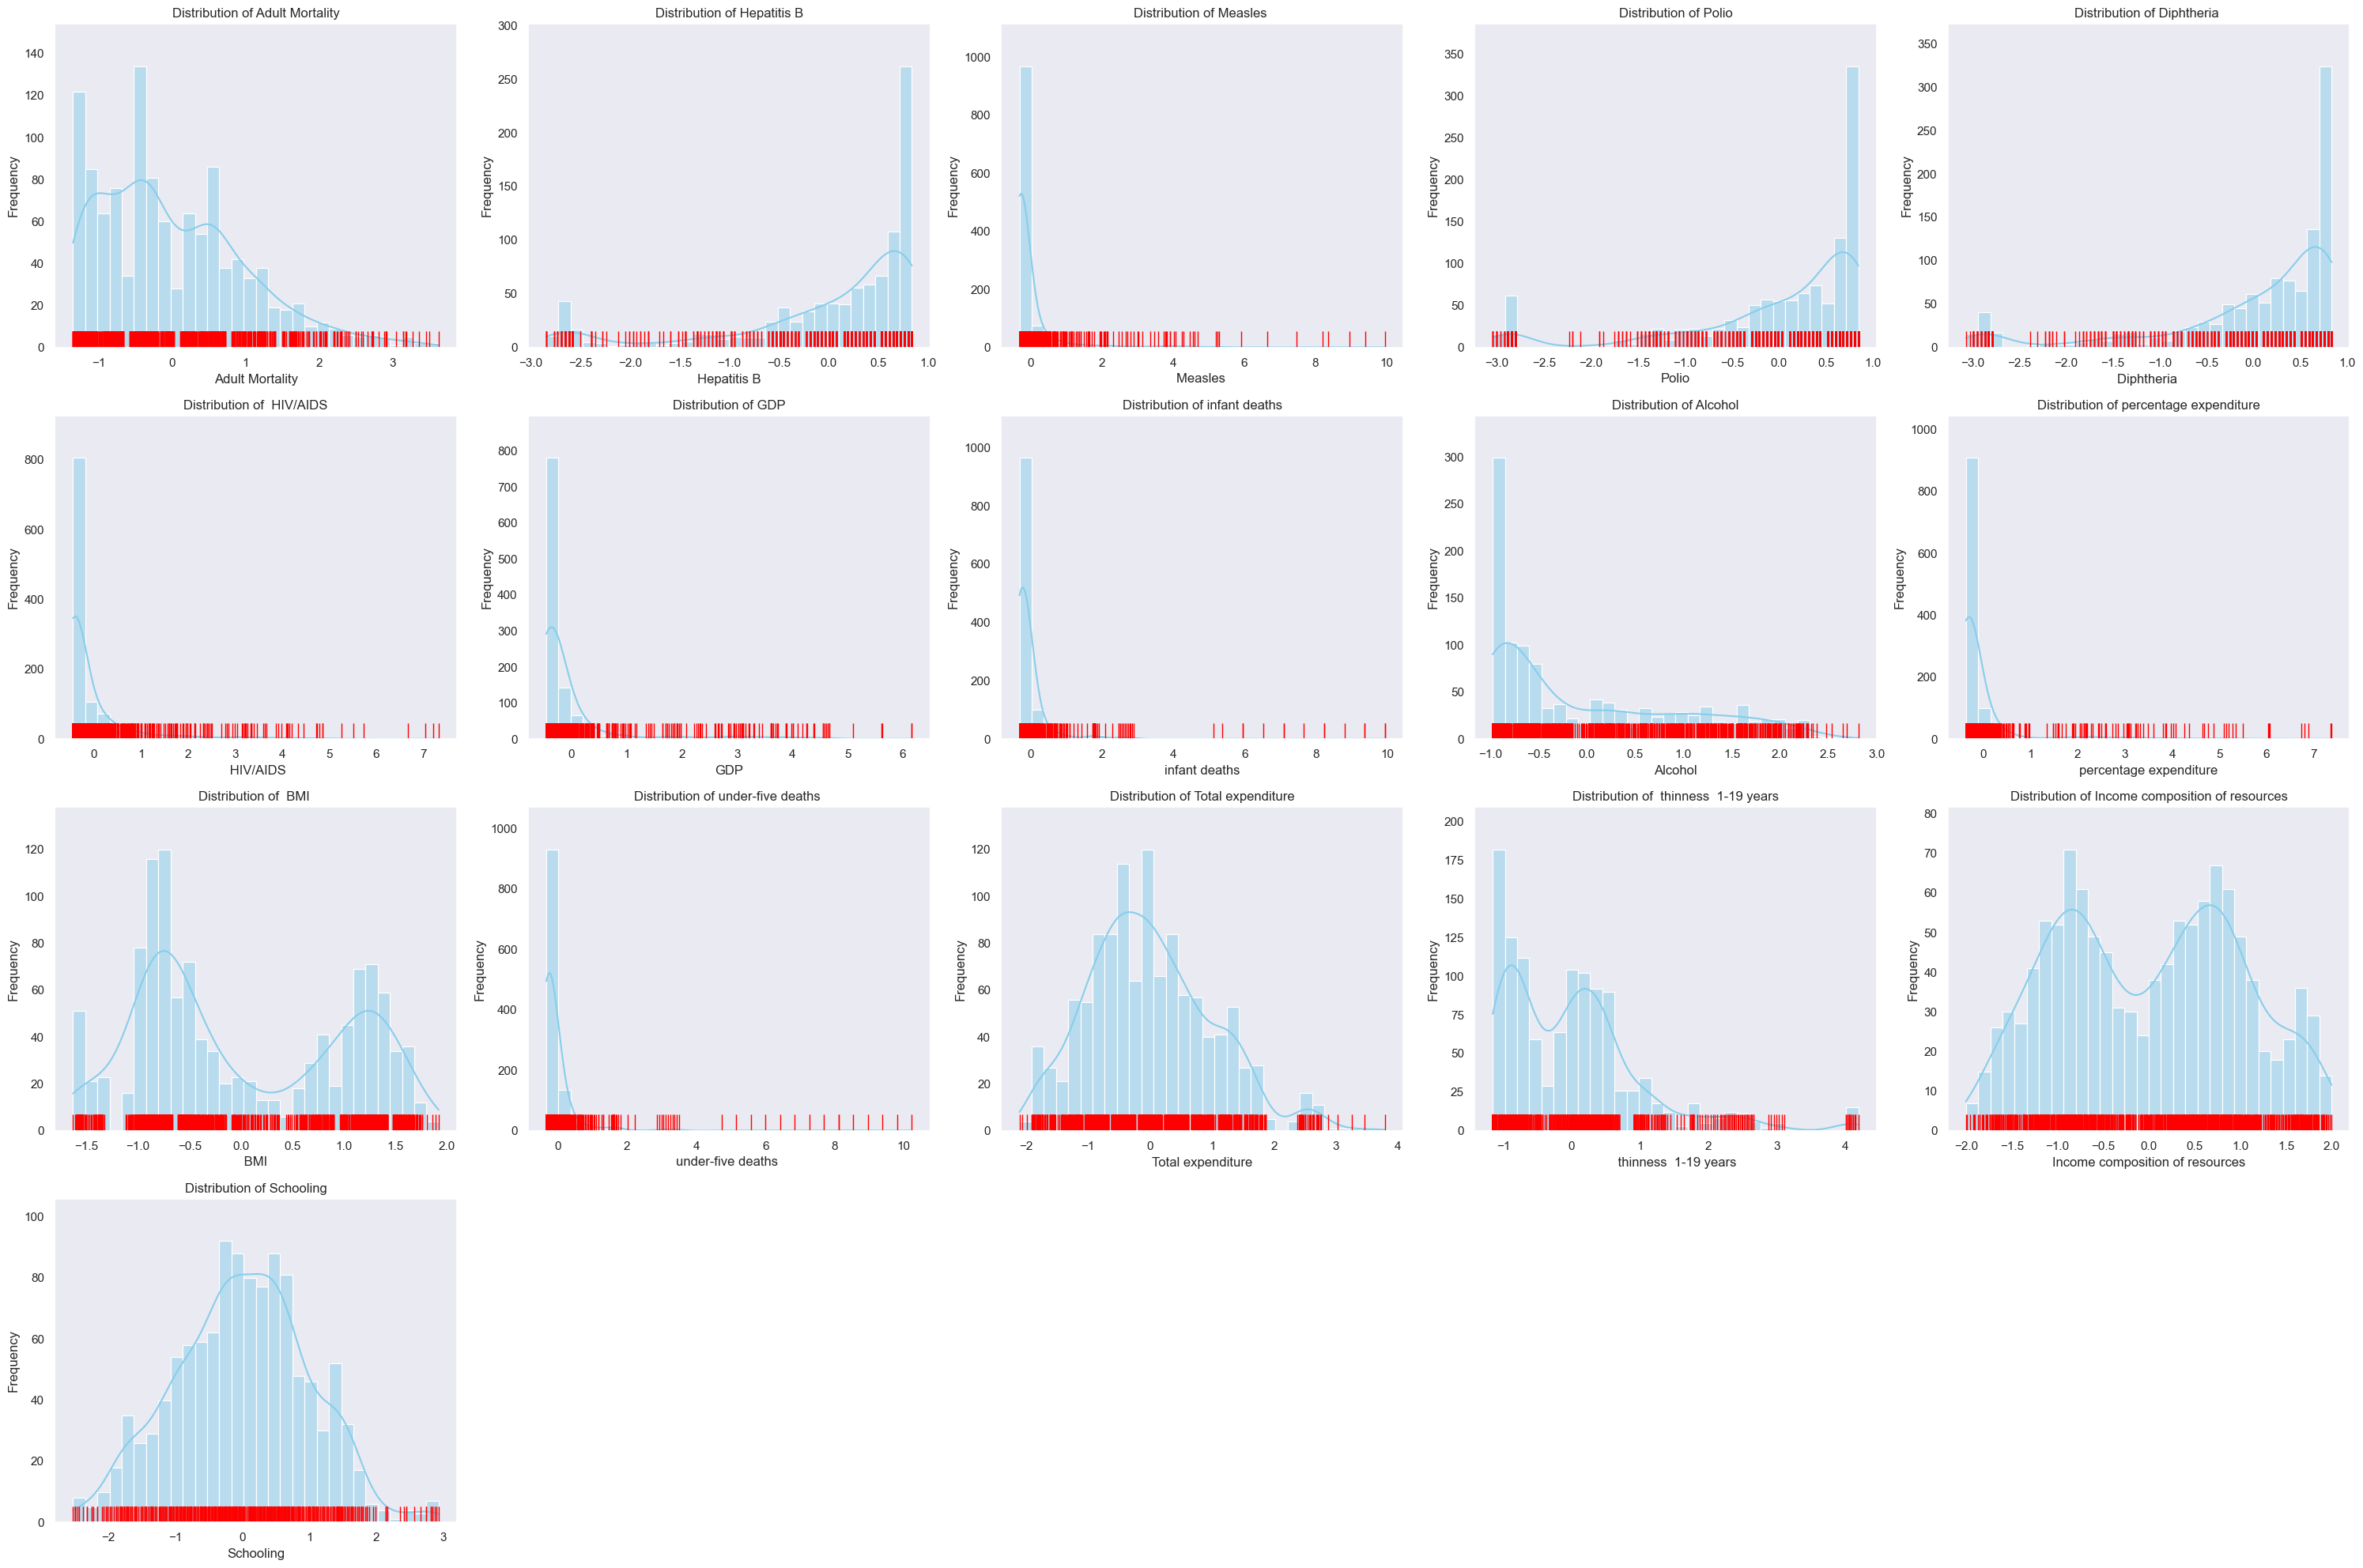

In [85]:
plt.figure(figsize=(30, 20))
for factor in factors:
    plt.subplot(4, 5, factors.index(factor) + 1)
    sns.histplot(df[factor], bins=30, kde=True, color='skyblue')
    sns.rugplot(df[factor], color='red', height=0.05)
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

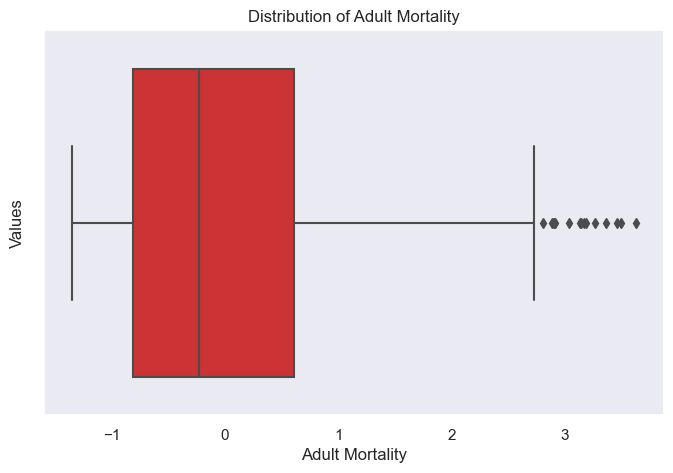

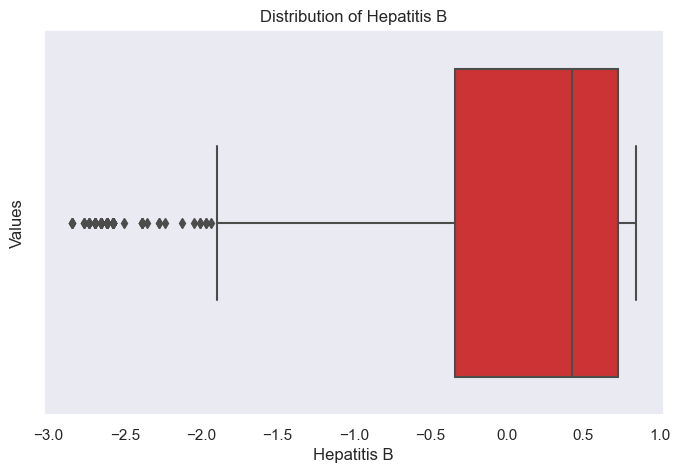

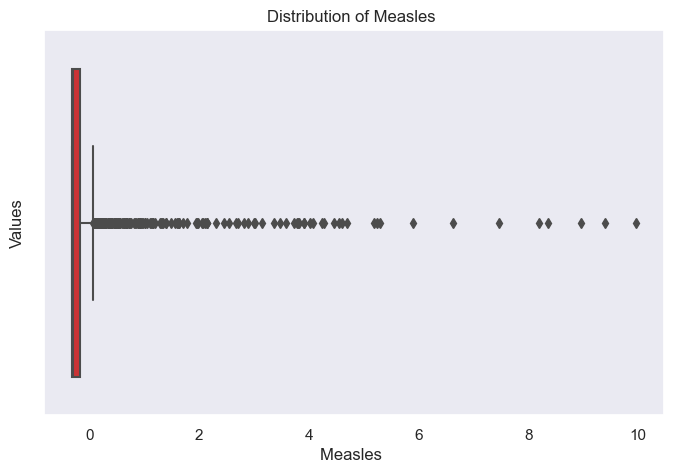

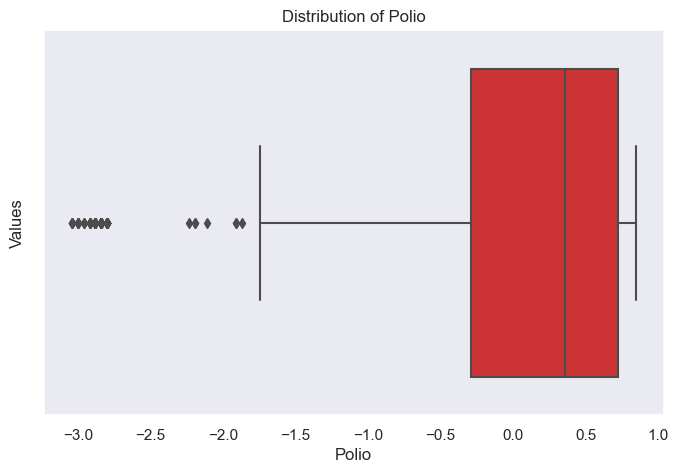

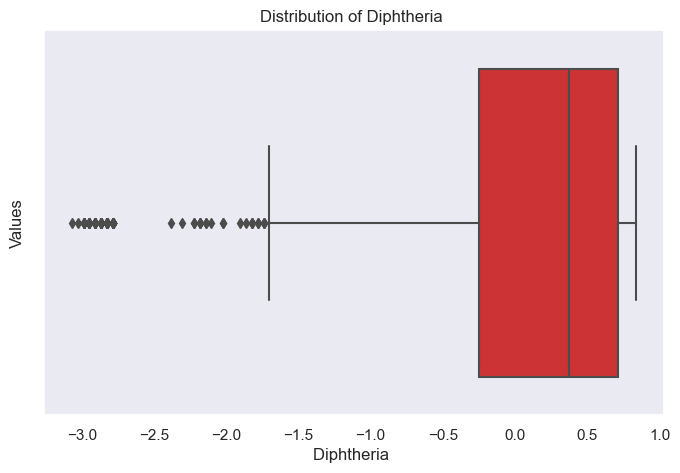

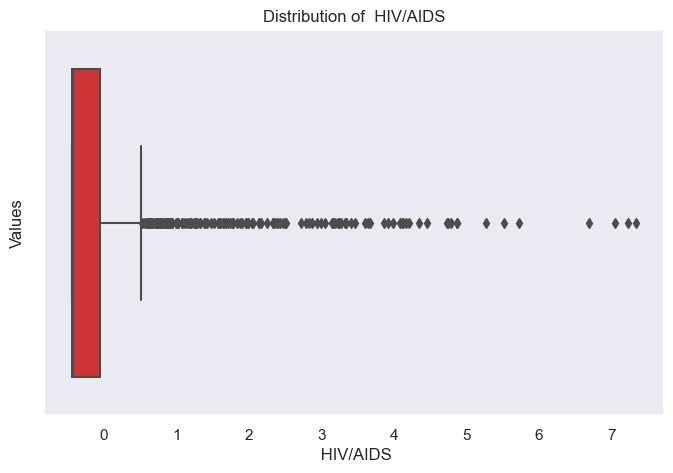

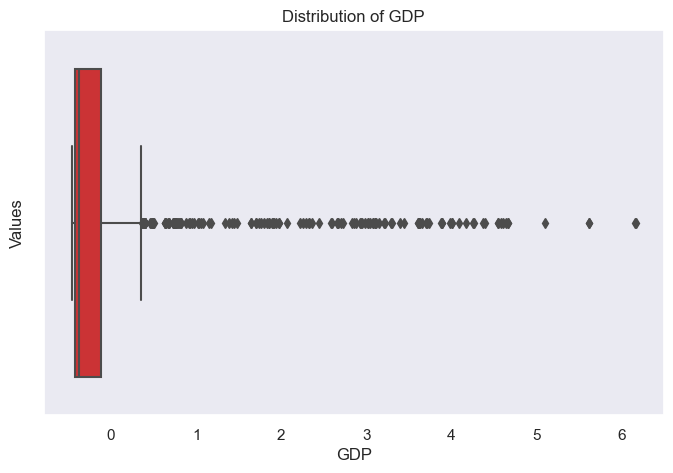

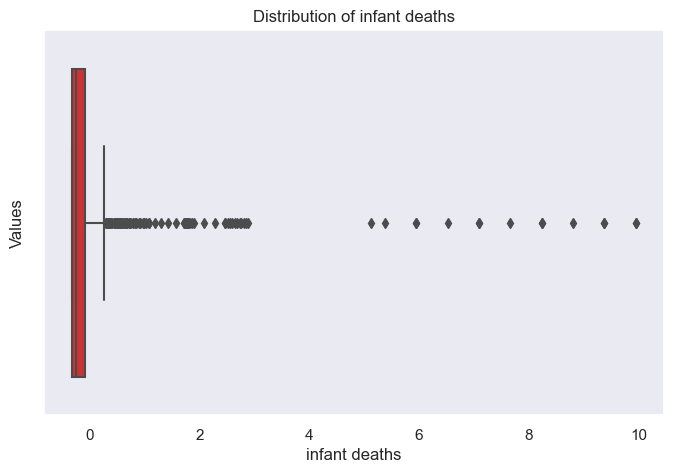

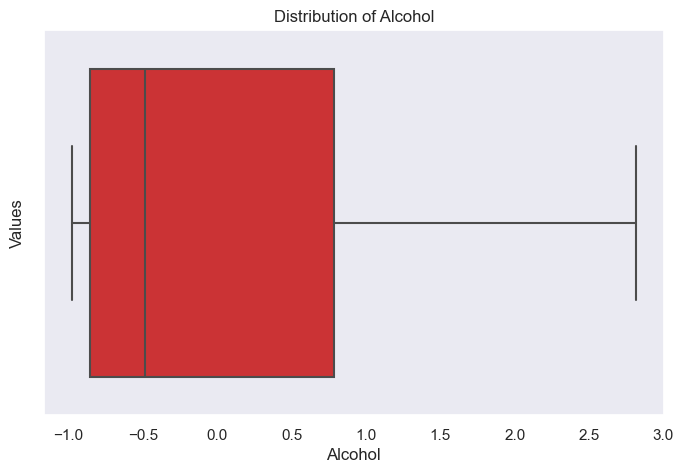

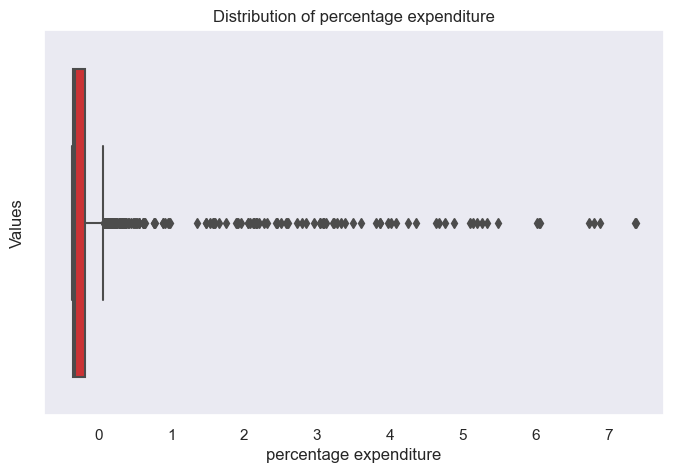

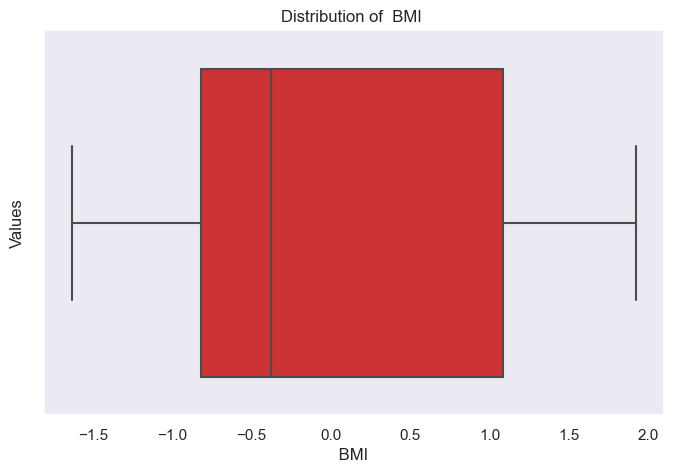

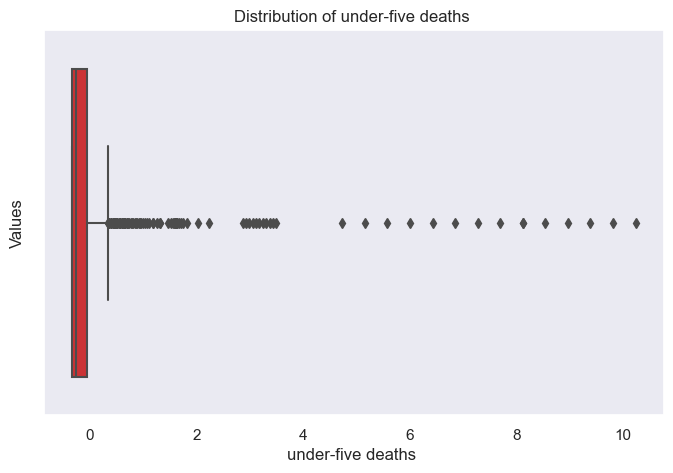

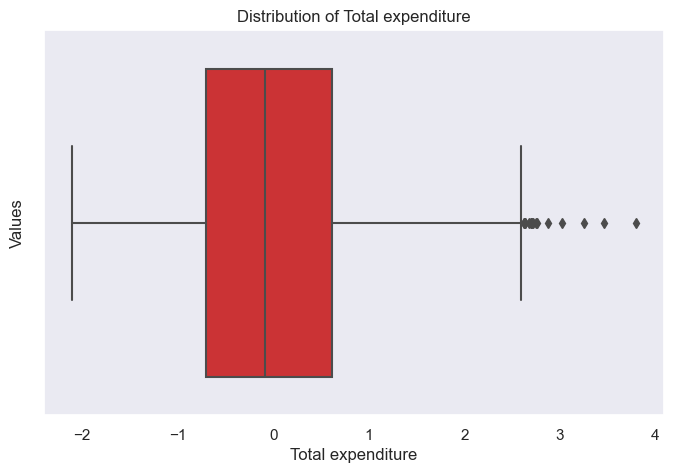

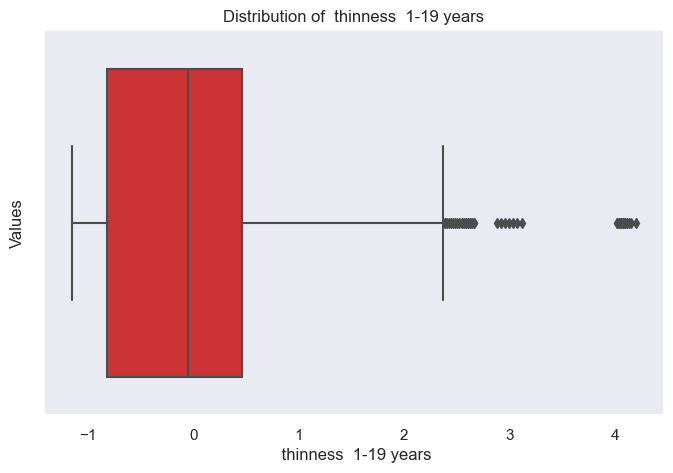

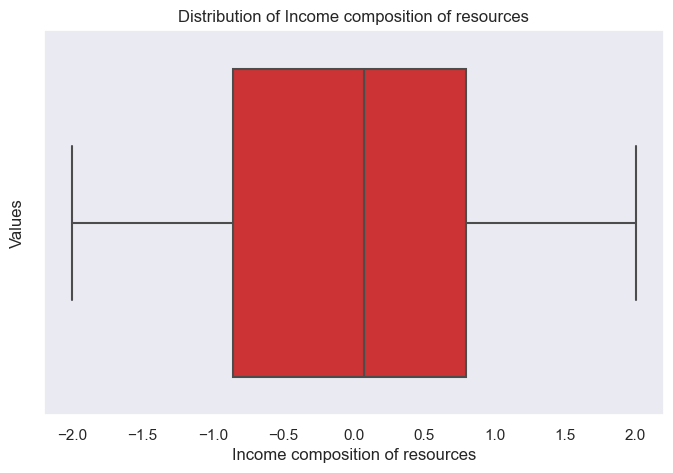

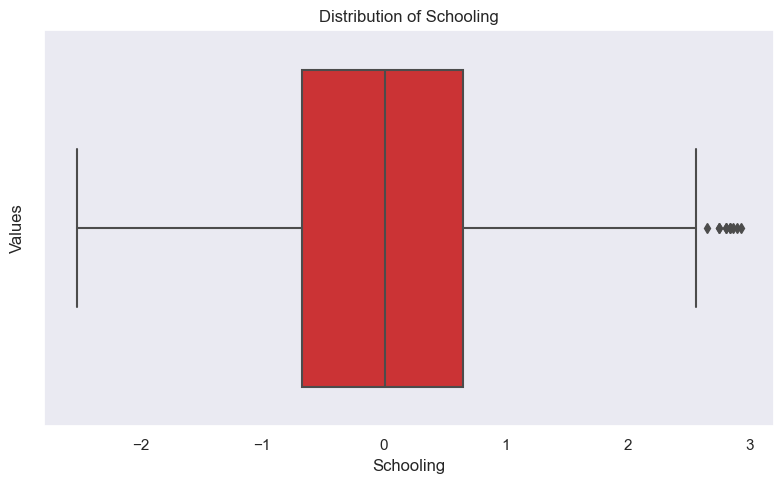

In [86]:
for factor in factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=factor, data=df, palette='Set1')
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [87]:
cov_matrix = df[factors].cov()
print(cov_matrix)

                                 Adult Mortality  Hepatitis B  Measles   \
Adult Mortality                         1.000863    -0.135557 -0.025653   
Hepatitis B                            -0.135557     1.001044 -0.137336   
Measles                                -0.025653    -0.137336  1.000863   
Polio                                  -0.247220     0.457992 -0.074535   
Diphtheria                             -0.258131     0.519995 -0.077707   
 HIV/AIDS                               0.561089    -0.117278 -0.023324   
GDP                                    -0.287102     0.057473 -0.092009   
infant deaths                           0.005807    -0.242955  0.499751   
Alcohol                                -0.066924     0.071270 -0.032545   
percentage expenditure                 -0.255736     0.000283 -0.084284   
 BMI                                   -0.372908     0.244405 -0.173546   
under-five deaths                       0.023323    -0.252477  0.491208   
Total expenditure        

In [88]:
factors_with_lx = factors + [Description.LIFE_EXPECTANCY.value]
cor_matrix = df[factors_with_lx].corr()
print(cor_matrix)

                                 Adult Mortality  Hepatitis B  Measles   \
Adult Mortality                         1.000000    -0.141687 -0.025631   
Hepatitis B                            -0.141687     1.000000 -0.135025   
Measles                                -0.025631    -0.135025  1.000000   
Polio                                  -0.247007     0.477941 -0.074471   
Diphtheria                             -0.257909     0.578457 -0.077640   
 HIV/AIDS                               0.560605    -0.118441 -0.023304   
GDP                                    -0.286855     0.056088 -0.091930   
infant deaths                           0.005802    -0.274488  0.499320   
Alcohol                                -0.066866     0.069321 -0.032517   
percentage expenditure                 -0.255515     0.000280 -0.084211   
 BMI                                   -0.372586     0.240730 -0.173397   
under-five deaths                       0.023303    -0.285766  0.490785   
Total expenditure        

In [89]:
std_deviation = df[factors].std()
print(std_deviation)

Adult Mortality                    1.000431
Hepatitis B                        1.000522
Measles                            1.000431
Polio                              1.000431
Diphtheria                         1.000431
 HIV/AIDS                          1.000431
GDP                                1.000431
infant deaths                      1.000431
Alcohol                            1.000431
percentage expenditure             1.000431
 BMI                               1.000431
under-five deaths                  1.000431
Total expenditure                  1.000431
 thinness  1-19 years              1.000431
Income composition of resources    1.000431
Schooling                          1.000431
dtype: float64


In [90]:
variance = df[factors].var()
print(variance)

Adult Mortality                    1.000863
Hepatitis B                        1.001044
Measles                            1.000863
Polio                              1.000863
Diphtheria                         1.000863
 HIV/AIDS                          1.000863
GDP                                1.000863
infant deaths                      1.000863
Alcohol                            1.000863
percentage expenditure             1.000863
 BMI                               1.000863
under-five deaths                  1.000863
Total expenditure                  1.000863
 thinness  1-19 years              1.000863
Income composition of resources    1.000863
Schooling                          1.000863
dtype: float64


c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

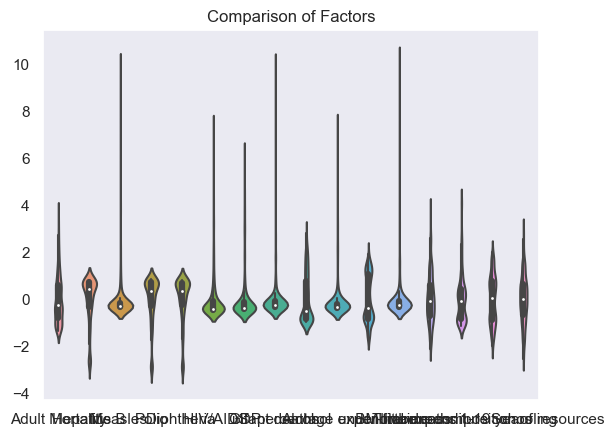

In [91]:
sns.violinplot(data=df[factors])
plt.title('Comparison of Factors')
plt.show()

ValueError: Invalid format specifier

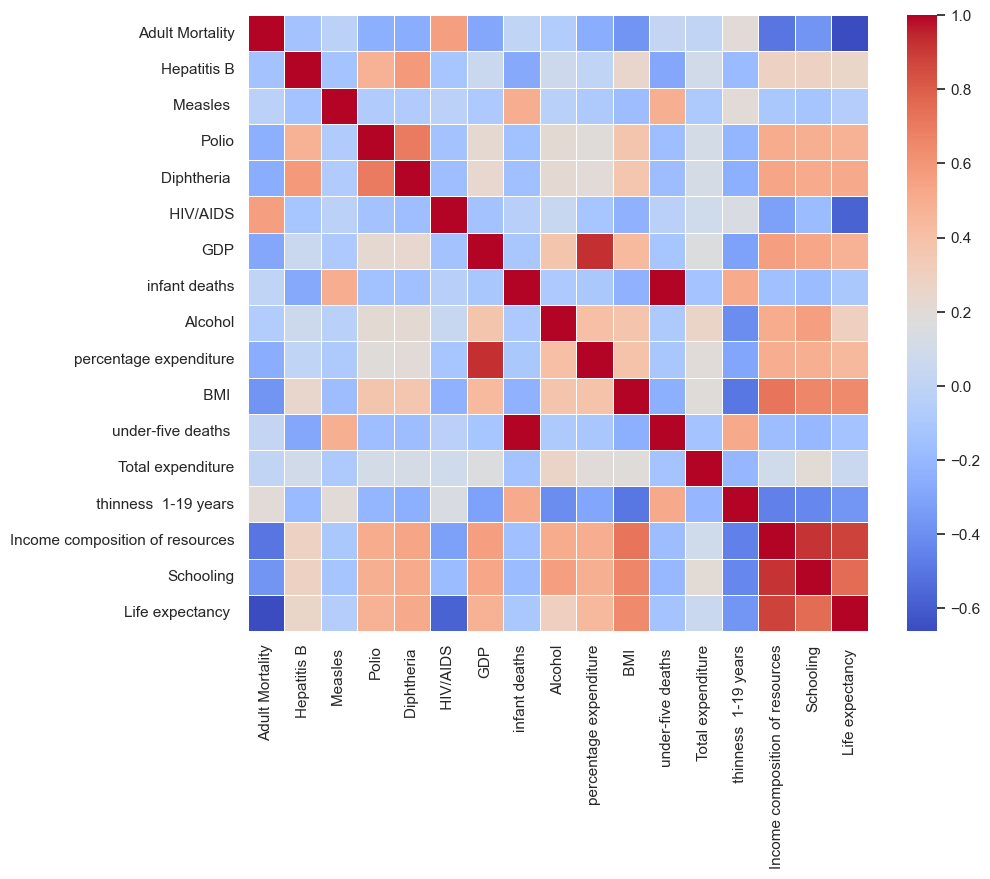

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2ft', linewidth=.5) 
plt.title('Correlation')
plt.show()

Як рівень дитячої та дорослої смертності впливає на рівень життя

In [97]:
def pearson_factor(factor1, factor2):
    correlation = df[[factor2, factor1]].corr().iloc[0, 1]
    print(f'Correlation between {factor1} and {factor2}: {correlation:.2f}')

pearson_factor(Factors.INFANT_DEATHS.value, Description.LIFE_EXPECTANCY.value)
pearson_factor(Factors.ADULT_MORTALITY.value, Description.LIFE_EXPECTANCY.value)

Correlation between infant deaths and Life expectancy : -0.10
Correlation between Adult Mortality and Life expectancy : -0.66


Чи повинна країна з нижчим значенням очікуваної тривалості життя (<65) збільшити витрати на охорону здоров’я, щоб покращити середню тривалість життя?

In [96]:
pearson_factor(Factors.PERCENTAGE_EXPENDITURE.value, Description.LIFE_EXPECTANCY.value)

Correlation between percentage expenditure and Life expectancy : 0.44


Чи має очікувана тривалість життя позитивну чи негативну кореляцію зі звичками в їжі, способом життя, фізичними вправами, курінням, вживанням алкоголю тощо.

In [94]:
lifestyle_with_lx = [Factors.BMI.value, Factors.ALCOHOL.value, Factors.THINNESS_1_19_YEARS.value, Description.LIFE_EXPECTANCY.value]
cor_matrix = df[lifestyle_with_lx].corr()
print(cor_matrix)

                           BMI    Alcohol   thinness  1-19 years  \
 BMI                   1.000000  0.379414              -0.495270   
Alcohol                0.379414  1.000000              -0.406870   
 thinness  1-19 years -0.495270 -0.406870               1.000000   
Life expectancy        0.643614  0.303147              -0.365998   

                       Life expectancy   
 BMI                           0.643614  
Alcohol                        0.303147  
 thinness  1-19 years         -0.365998  
Life expectancy                1.000000  


Який вплив навчання в школі на тривалість життя людини?

In [93]:
pearson_factor(Factors.SCHOOLING.value, Description.LIFE_EXPECTANCY.value)

Correlation between Schooling and Life expectancy : 0.75


Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?

In [99]:
pearson_factor(Factors.ALCOHOL.value, Description.LIFE_EXPECTANCY.value)

Correlation between Alcohol and Life expectancy : 0.30


Який вплив охоплення імунізацією на очікувану тривалість життя?

In [100]:
pearson_factor(Factors.HIV_AIDS.value, Description.LIFE_EXPECTANCY.value)

Correlation between  HIV/AIDS and Life expectancy : -0.57
